In [1]:
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

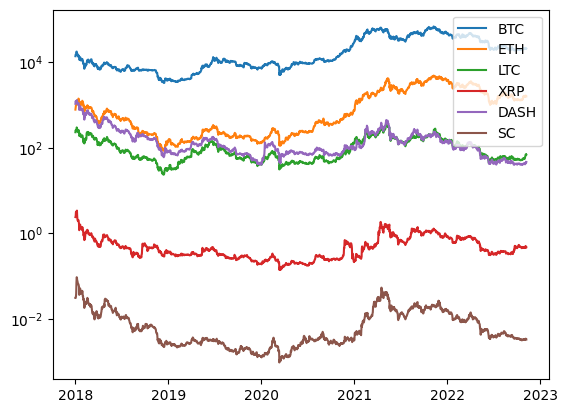

                     BTC          ETH         LTC       XRP         DASH  \
Date                                                                       
2018-01-01  13657.200195   772.640991  229.033005  2.391030  1053.979980   
2018-01-02  14982.099609   884.443970  255.684006  2.480900  1217.719971   
2018-01-03  15201.000000   962.719971  245.367996  3.105370  1170.739990   
2018-01-04  15599.200195   980.921997  241.369995  3.196630  1229.790039   
2018-01-05  17429.500000   997.719971  249.270996  3.048710  1152.410034   
...                  ...          ...         ...       ...          ...   
2022-11-03  20209.988281  1531.541748   61.921314  0.455135    41.823441   
2022-11-04  21147.230469  1645.093384   67.596596  0.504404    44.561283   
2022-11-05  21282.691406  1627.968018   69.721199  0.493330    45.459808   
2022-11-06  20926.486328  1572.234741   68.086052  0.470670    43.710430   
2022-11-07  20671.585938  1573.078979   68.648148  0.468442    46.208633   

           

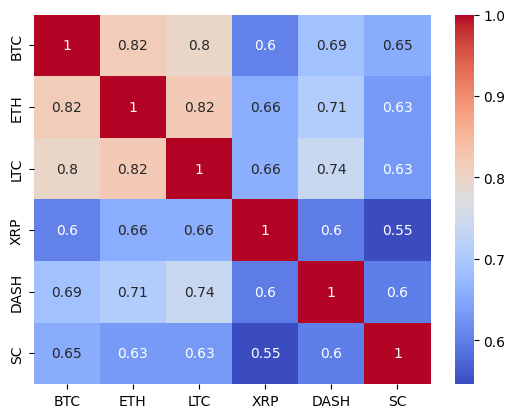

In [2]:
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1)
end = dt.datetime.now()

crypto = ['BTC', 'ETH', 'LTC', 'XRP', 'DASH', 'SC']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

plt.yscale('log') # first show linear

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper right")

plt.show()

# # Correlation Heat Map

print(combined)

combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()